In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bagging

In [10]:
def bag(X,y):
    # counts the number or rows in the feature matrix
    n_samples = X.shape[0]
    
    # Generate a random sample from the given input.
    indices = np.random.choice(n_samples, size = n_samples,
                                replace = True, random_state=1)
    
    # replace = True so that the no of features remains the same
    
    return X[indices], y[indices]

# Majority Voting

In [11]:
def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

# Random Forest class
default parameters
number of trees = 10
minimum number of samples = 2
maximum depth = 100

In [12]:
class RandomForest:
    def __init__(self, n_trees = 10, min_samples_split = 2, max_depth = 100, max_features = None):
        self.n_trees = n_trees # hyperparameter for fixing number of trees to be generated
        self.min_samples_split = min_samples_split # min umber of samples required for split
        self.max_depth = max_depth # maximum depth of the decision tree
        self.max_features = max_features # maximum number of features to be considered
        self.trees = []


def fit(self, X, y):
    self.trees = []
    for _ in range(self.n_trees):
        tree = DecisionTreeClassifier(
        min_samples_split = self.min_samples_split,
        max_depth = self.max_depth,
        max_features = self.max_features,
        )
        X_sample, y_sample = bad(X,y)
        tree.fit(X_sample, y_sample)
        self.trees.append(tree)
        
def predict(self, X):
    tree_predict = np.array(tree.predict(X) for tree in self.trees) # converting list ot numpy array
    tree_predict = np.swapaxes(tree_predict, 0, 1) # each of the trees will give out prediction
    y_pred = [most_common_label(tree_pred) for tree_pred in tree_predict]
    return np.array(y_pred)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [13]:
# test
#arr = np.array([[0,1], [2,3]], [[4,5], [6,7]])
arr1 = np.array([[[0, 1], [2, 3]], [[4, 5], [6, 7]]])
arr1

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [14]:
np.swapaxes(arr1, 0,1)

array([[[0, 1],
        [4, 5]],

       [[2, 3],
        [6, 7]]])

In [15]:
np.swapaxes(arr1, 0,2)

array([[[0, 4],
        [2, 6]],

       [[1, 5],
        [3, 7]]])

In [16]:
np.transpose(arr1)

array([[[0, 4],
        [2, 6]],

       [[1, 5],
        [3, 7]]])

# Gradient Boost

In [18]:
def GradBoost(model, X_train, y_train, X_test, boosting_rounds,
              learning_rate: float = 0.1):
    # maek a first guess of our training target variable using the mean of y_train
    y_hat_train  = np.repeat(np.mean(y_train), len(y_train))
    
    # initialize the test prediction with the mean of the training target variable
    y_hat_test = np.repeat(np.mean(y_train), len(X_test))
    
    # calculate the residueals from the training data using the first guess
    residuals = y_train - y_hat_train
    
    # iterates through the boosting round
    for i in range(0, boosting_rounds):
        # fit the model to the residuals
        model = model.fit(X_train, residuals)
        
        # increment the predicted training y with the pseudo residual * learning rate
        y_hat_train = y_hat_train + learning_rate * model.predict(X_train)
        
        # increment the predicted test y as well
        y_hat_test = y_hat_test + learning_rate * model.predict(X_test)
        
        # calculate the residuals for next round
        residuals = y_train - y_hat_train
    
    return y_hat_train, y_hat_test

## Creating syntehtic dataset 

In [19]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples = 1000,
                      n_features = 20,
                      n_informative = 15,
                      n_targets = 1,
                      bias = 0.0,
                      noise = 20,
                      shuffle = True,
                      random_state = 13)

X_train = X[0:800]
y_train = y[0:800]

X_test = X[800:]
y_test = y[800:]

In [25]:
# using DecisionTreeRegressor as a week learner of depth 3

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(criterion = 'squared_error', max_depth=2)

In [26]:
# Let us see how squared error reduces as we keep increasin th numbe rof rounds.

In [29]:
mse_train = []

n_rounds = np.arange(5,101,5)

for n_round in n_rounds:
    y_hat_train = GradBoost(model,
                           X_train,
                           y_train,
                           X_test,
                           boosting_rounds=n_round,
                           learning_rate = 0.1)[0]
    
    print("round# ", n_round)
    mse_train.append(np.mean((y_train - y_hat_train) ** 2))

round#  5
round#  10
round#  15
round#  20
round#  25
round#  30
round#  35
round#  40
round#  45
round#  50
round#  55
round#  60
round#  65
round#  70
round#  75
round#  80
round#  85
round#  90
round#  95
round#  100


Text(0, 0.5, 'Training Mean Squared Error')

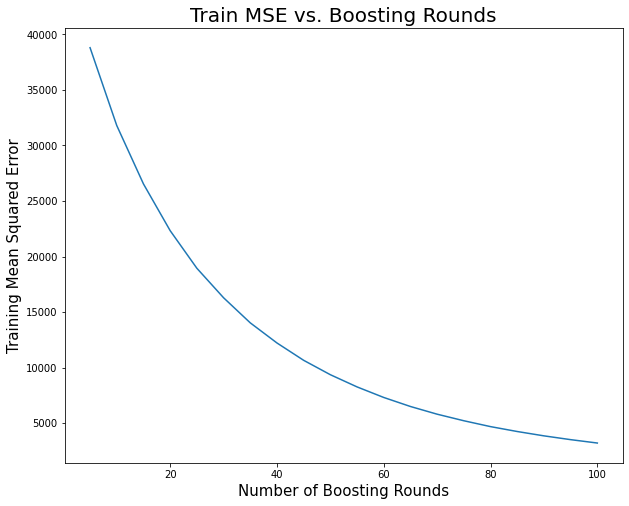

In [30]:
plt.rcParams['figure.figsize'] = (10,8)

plt.plot(n_rounds, mse_train)
plt.title("Train MSE vs. Boosting Rounds", fontsize = 20)
plt.xlabel("Number of Boosting Rounds", fontsize = 15)
plt.ylabel("Training Mean Squared Error", fontsize = 15)

### Comparing the actual target values with the predicted values for a given boosting_rounds value.
### Initially we consider the mean of y_train values as the prediction

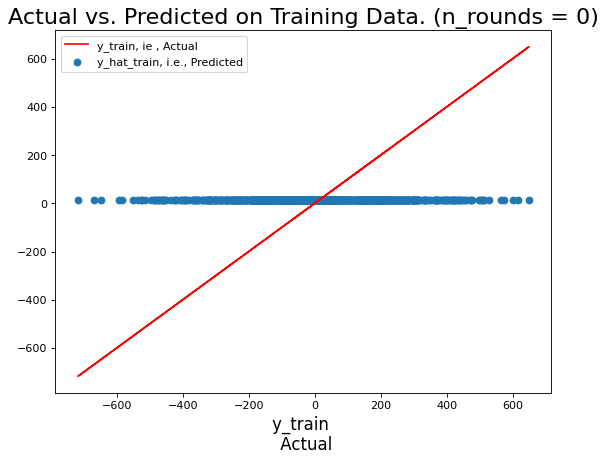

In [34]:
fig = plt.figure(figsize = (8,6), dpi = 80, facecolor = 'w', edgecolor = 'k')

n_rounds = 0

y_hat_train, y_hat_test = GradBoost(model,
                                   X_train,
                                   y_train,
                                   X_test,
                                   boosting_rounds = n_rounds,
                                   learning_rate = 0.1)

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e., Predicted')
plt.title('Actual vs. Predicted on Training Data. (n_rounds = '+str(n_rounds)+')', fontsize = 20)
plt.xlabel('y_train \n Actual', fontsize = 15)
plt.plot(y_train, y_train, color = 'r', label = 'y_train, ie , Actual')
plt.legend()

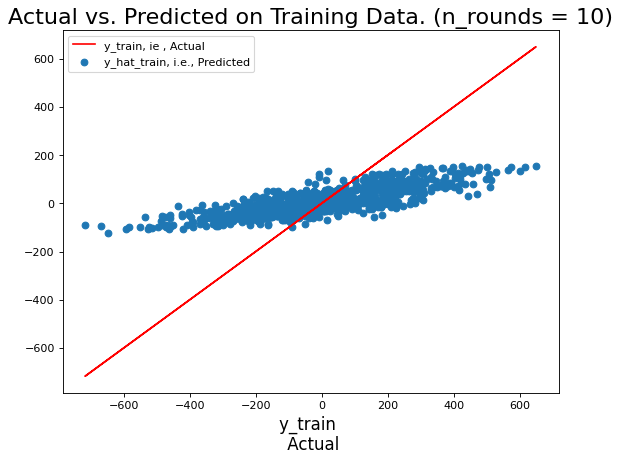

In [35]:
fig = plt.figure(figsize = (8,6), dpi = 80, facecolor = 'w', edgecolor = 'k')

n_rounds = 10

y_hat_train, y_hat_test = GradBoost(model,
                                   X_train,
                                   y_train,
                                   X_test,
                                   boosting_rounds = n_rounds,
                                   learning_rate = 0.1)

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e., Predicted')
plt.title('Actual vs. Predicted on Training Data. (n_rounds = '+str(n_rounds)+')', fontsize = 20)
plt.xlabel('y_train \n Actual', fontsize = 15)
plt.plot(y_train, y_train, color = 'r', label = 'y_train, ie , Actual')
plt.legend()

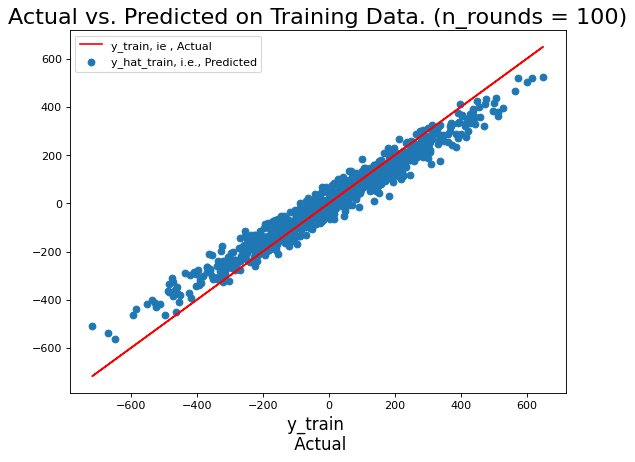

In [36]:
fig = plt.figure(figsize = (8,6), dpi = 80, facecolor = 'w', edgecolor = 'k')

n_rounds = 100

y_hat_train, y_hat_test = GradBoost(model,
                                   X_train,
                                   y_train,
                                   X_test,
                                   boosting_rounds = n_rounds,
                                   learning_rate = 0.1)

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e., Predicted')
plt.title('Actual vs. Predicted on Training Data. (n_rounds = '+str(n_rounds)+')', fontsize = 20)
plt.xlabel('y_train \n Actual', fontsize = 15)
plt.plot(y_train, y_train, color = 'r', label = 'y_train, ie , Actual')
plt.legend()

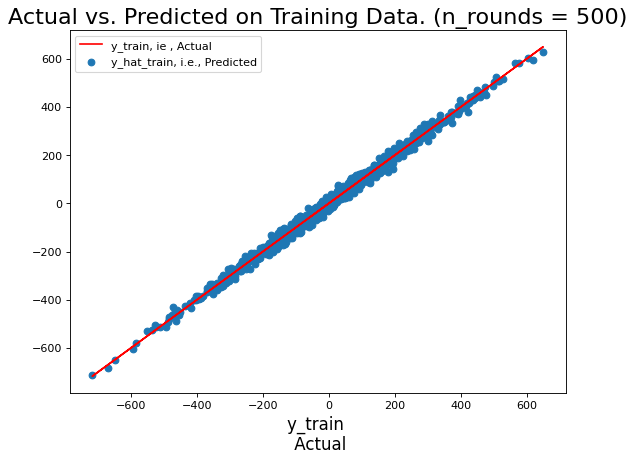

In [37]:
fig = plt.figure(figsize = (8,6), dpi = 80, facecolor = 'w', edgecolor = 'k')

n_rounds = 500

y_hat_train, y_hat_test = GradBoost(model,
                                   X_train,
                                   y_train,
                                   X_test,
                                   boosting_rounds = n_rounds,
                                   learning_rate = 0.1)

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e., Predicted')
plt.title('Actual vs. Predicted on Training Data. (n_rounds = '+str(n_rounds)+')', fontsize = 20)
plt.xlabel('y_train \n Actual', fontsize = 15)
plt.plot(y_train, y_train, color = 'r', label = 'y_train, ie , Actual')
plt.legend()

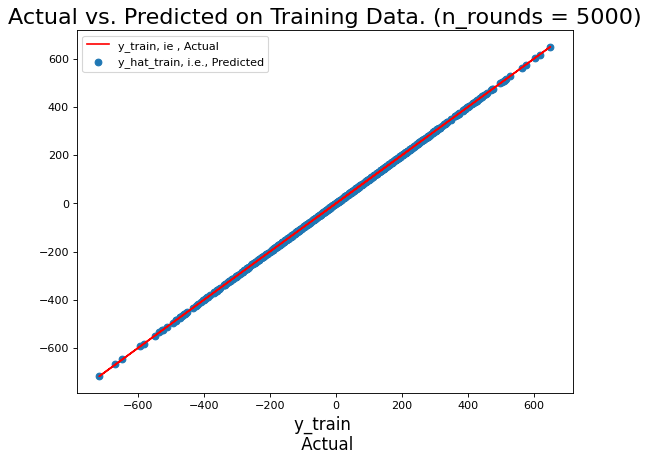

In [39]:
fig = plt.figure(figsize = (8,6), dpi = 80, facecolor = 'w', edgecolor = 'k')

n_rounds = 5000

y_hat_train, y_hat_test = GradBoost(model,
                                   X_train,
                                   y_train,
                                   X_test,
                                   boosting_rounds = n_rounds,
                                   learning_rate = 0.1)

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e., Predicted')
plt.title('Actual vs. Predicted on Training Data. (n_rounds = '+str(n_rounds)+')', fontsize = 20)
plt.xlabel('y_train \n Actual', fontsize = 15)
plt.plot(y_train, y_train, color = 'r', label = 'y_train, ie , Actual')
plt.legend()

# Temp Test

In [52]:
n = 100000

tosses = np.random.randint(0,2,n) # 0 = Head, 1 = Tails

print("Probability of head: ",np.count_nonzero(tosses == 0) / len(tosses))

Probability of head:  0.50034


# Training a Voting Classifier


# Make moons dataset

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X_moon,y_moon = make_moons(n_samples = 500, noise = 0.3, random_state=42)
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X,y, random_state=42)

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
        estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
        voting = 'hard'
)

voting_clf.fit(X_moon_train, y_moon_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [62]:
from sklearn.metrics import classification_report, accuracy_score

In [63]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_moon_train, y_moon_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_moon_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.88
SVC 0.896
VotingClassifier 0.912


# Bagging and Pasting in SKLEARN

In [67]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
            DecisionTreeClassifier(), n_estimators = 500,
            max_samples = 100, bootstrap = True, n_jobs = -1)

bag_clf.fit(X_moon_train, y_moon_train)
y_pred = bag_clf.predict(X_moon_test)

In [68]:
print(classification_report(y_moon_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        61
           1       0.95      0.88      0.91        64

    accuracy                           0.91       125
   macro avg       0.91      0.91      0.91       125
weighted avg       0.91      0.91      0.91       125

